In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split

# Introduction
We will provide a walk-through tutorial of the "Data Science Pipeline" that can be used as a guide for Data Science Projects. We will consider the following phases:

1. Data Collection/Curation
2. Data Management/Representation
3. Exploratory Data Analysis
4. Hypothesis Testing and Machine Learning
5. Communication of insights attened

For this project we will consider a [supervised machine learning](https://en.wikipedia.org/wiki/Supervised_learning) problem, and more particularly a [regression model](https://en.wikipedia.org/wiki/Regression_analysis).  

The Regression models involve the following components:

* The unknown parameters, often denoted as a scalar or vector $β$ .
* The independent variables, which are observed in data and are often denoted as a vector $X_i$.
* The dependent variable, which are observed in data and often denoted using the scalar $Y_i$.
The error terms, which are not directly observed in data and are often denoted using the scalar $e_i$.

This tutorial is based on Python programming language and we will work with different libraries like `pandas`, `numpy`, `matplotlib`, `scikit-learn` and so on. Finally, in this tutorial we provide references and resources in the form of hyperlinks.  

# Data Collection/Curation

The [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) is a Machine Learning Repository which maintains *585 data sets* as a service to the machine learning community. You may view all data sets through our searchable interface. For a general overview of the Repository, please visit our About page. For information about citing data sets in publication. For our project, we chose to work with the [Bike Sharing Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

### Bike Sharing Dataset
This dataset contains the **hourly** count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Our goal is to build a Machine Learning model which will be able to predict the count of rental bikes.

# Data Management/Representation

The fields of our dataset are the following:

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
 Let's start the analysis by loading the data.


In [32]:
df = pd.read_csv("hour.csv")

In [33]:
# get the first rows
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Feature Leakage
If we look carefully at our data, we will see that the addition of the `casual` and `registered` columns yield to the `cnt` column. This is what we call [leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning) and for that reason we will remove them from our dataset. The reason for that is when we want to predict the total Bike Rentals `cnt`, we will have as "known" indpendent variables the "casual" and the "registered" which is not true, since by the time of prediction we will lack this info.

In [34]:
# drop the 'casual' and 'registered' columns
df.drop(['casual', 'registered'], axis=1, inplace=True)

### Remove the instant column
We will also remove the `instant` from our model since is not an explanatory variable.

In [35]:
df.drop(['instant'], axis=1, inplace=True)

### Transform the Columns to the Right Data Type.

We will change the Data Type of the following columns:

* `dteday`: Conver it to Date
* `season`: Convert it to Categorical
* `weekday`: Convert it to Categorical
* `mnth`: Conver it to Categorical

In [36]:
# let's convert them
df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df['season'].astype("category")
df['weekday'] = df['weekday'].astype("category")
df['mnth'] = df['mnth'].astype("category")

# check the data types
df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
hr                     int64
holiday                int64
weekday             category
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

### Check for Missing Values
At this point we will check for any missing values in our data

In [37]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

As we can see there is no missing value in any field.

### Check for Duplicated Values
At this point we will check if there are are duplicated values, where as we can see below, there are not duplicated values. So, we are ok to proceed

In [38]:
df.duplicated().sum()

0

### Description of the Dataset
Let's see a summary of our data fields for the continuous variables by showing the mean, std, min, max, and the Q1,Q2,Q3

In [39]:
df.describe()

,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,11.546752,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.500008,6.914405,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,1.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,1.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


Finally, let's the number of rows and colums of our dataset so far.

In [40]:
df.shape

(17379, 14)

# Exploratory Data Analysis
At this point we run an [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis). Let's have a look at the Bike Rentals across time.

### Time Series Plot of Hourly Rental Bikes

Text(0, 0.5, 'cnt')

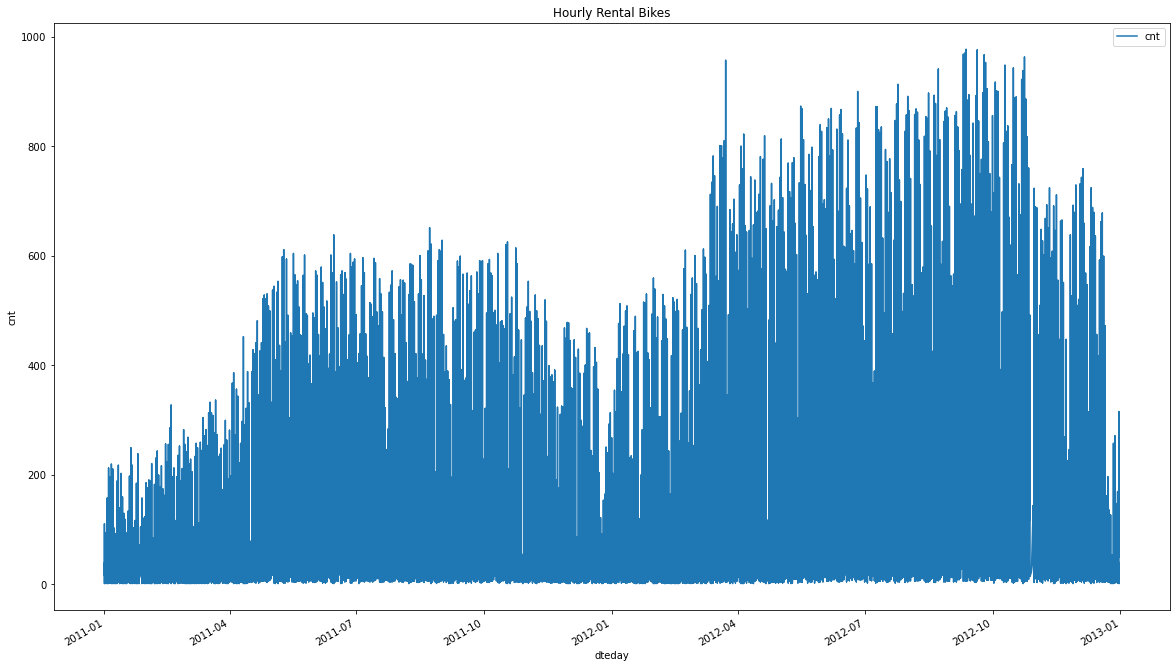

In [41]:
df.plot(x='dteday', y='cnt', figsize=(20,12), title = 'Hourly Rental Bikes')
plt.ylabel('cnt')

### Distribution of the Rental Bikes

<AxesSubplot:ylabel='Frequency'>

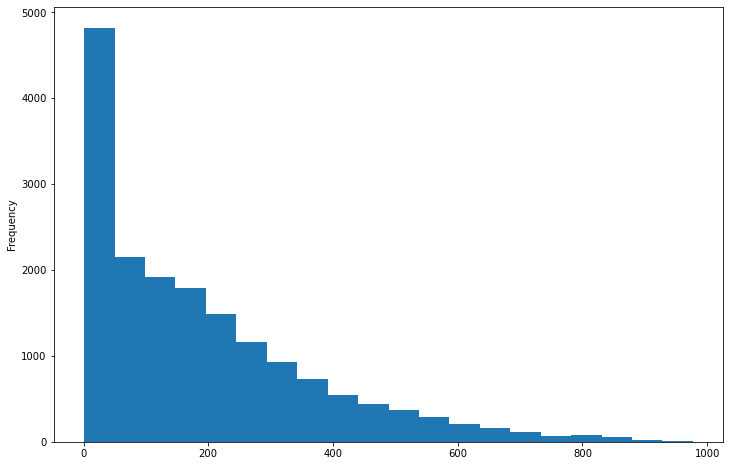

In [42]:
df['cnt'].plot.hist(bins=20, figsize=(12,8))

### Box Plots of Bike Rentals

Text(0.5, 1.0, 'Rental Bikes by Holiday')

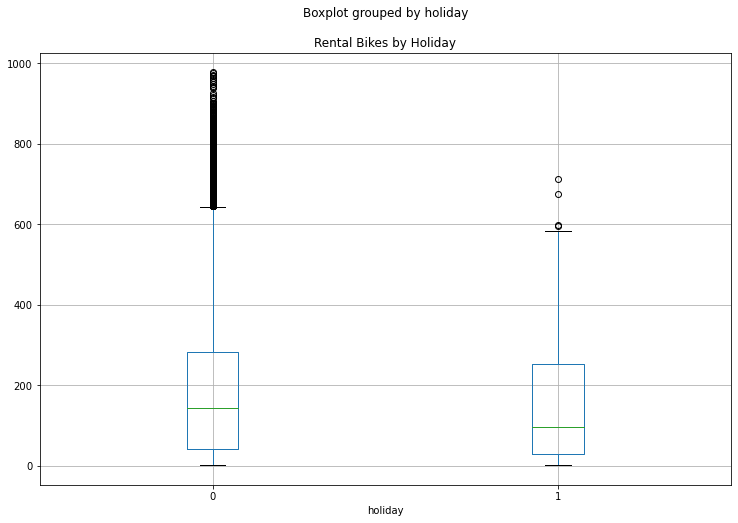

In [43]:
df.boxplot(by='holiday', column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Holiday")

Text(0.5, 1.0, 'Rental Bikes by Month')

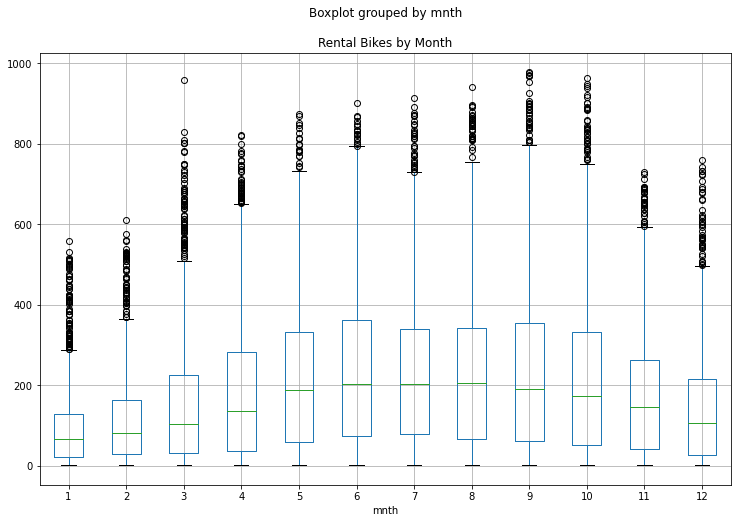

In [44]:
df.boxplot(by='mnth', column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Month")

Text(0.5, 1.0, 'Rental Bikes by Year')

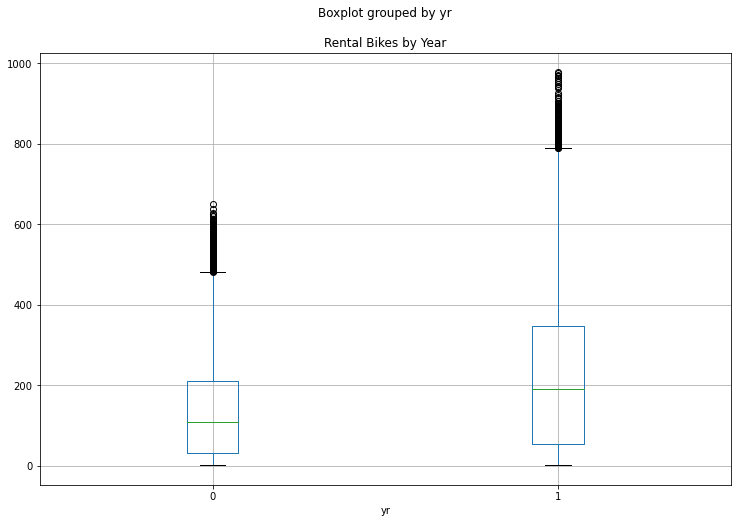

In [45]:
df.boxplot(by='yr', column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Year")

Text(0.5, 1.0, 'Rental Bikes by Season')

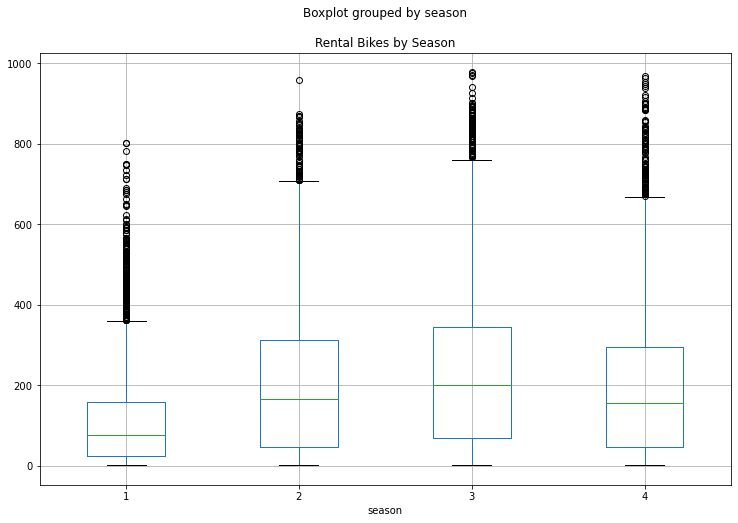

In [46]:
df.boxplot(by='season', column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Season")

Text(0.5, 1.0, 'Rental Bikes by Season and Year')

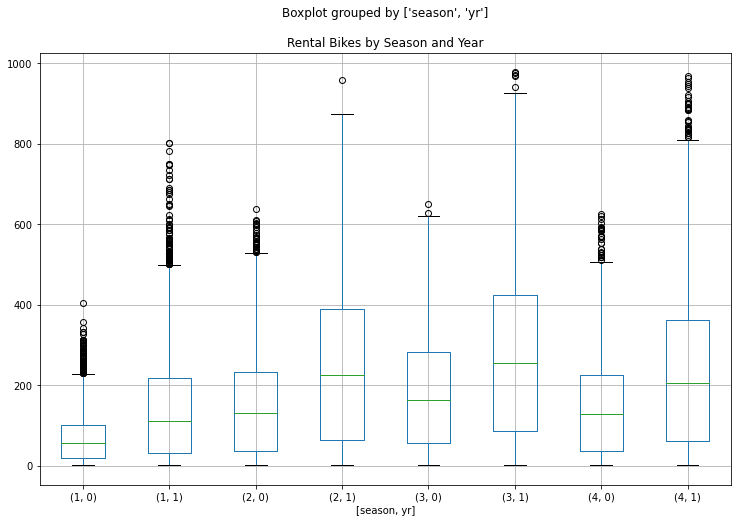

In [47]:
df.boxplot(by=['season','yr'], column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Season and Year")

Text(0.5, 1.0, 'Rental Bikes by Hour')

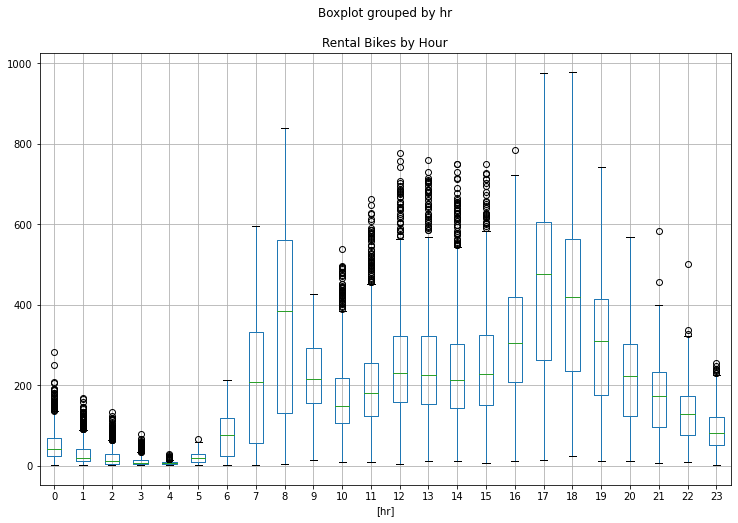

In [48]:
df.boxplot(by=['hr'], column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Hour")

Text(0.5, 1.0, 'Rental Bikes by Weekday')

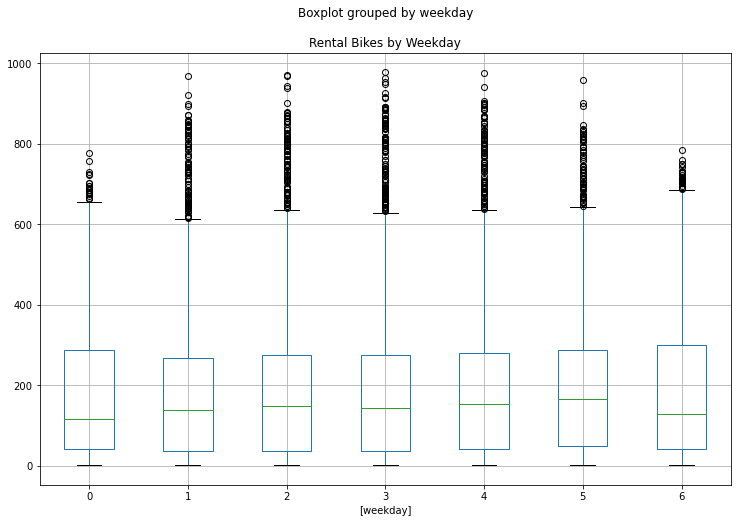

In [49]:
df.boxplot(by=['weekday'], column='cnt', figsize=(12,8))
plt.title("Rental Bikes by Weekday")

### Correlation and Correlation Heat Map
We will return the [correlation Pearson coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient) of the numeric variables. 

In [50]:
# get the correlation

df.corr()

,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
yr,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
hr,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
workingday,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weathersit,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.250495,0.394071,-0.030927,0.030284,-0.142426,0.404772,0.400929,-0.322911,0.093234,1.000000


In [51]:
# correlation of Rental Bikes vs the rest variables
df.drop('cnt', axis=1).corrwith(df.cnt)

yr            0.250495
hr            0.394071
holiday      -0.030927
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
dtype: float64

<AxesSubplot:>

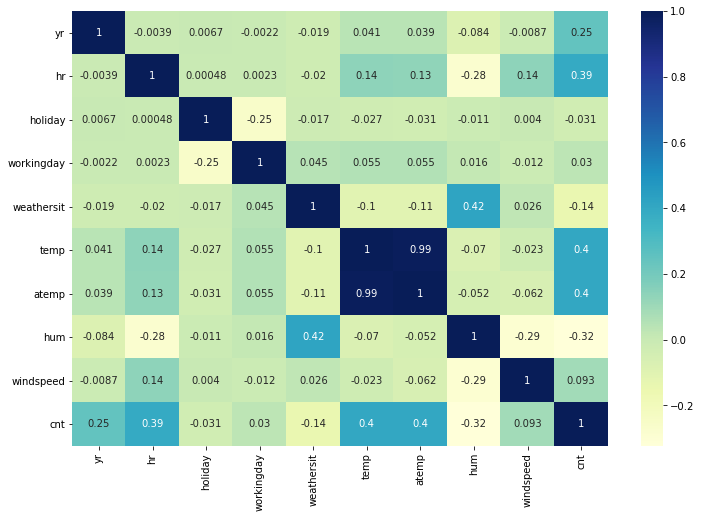

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

### Multi-Collinearity

As expected the `temp` and `atemp` are strongly correlated causing a problem of [muticollinearity](https://en.wikipedia.org/wiki/Multicollinearity#:~:text=Multicollinearity%20refers%20to%20a%20situation,equal%20to%201%20or%20%E2%88%921.) and that is why we will keep only one. We will remove the `temp`.

In [53]:
df.drop('temp', axis=1, inplace=True)

In [54]:
# remove also the date column since we will not use it for the machine learning modelling
df.drop('dteday', axis=1, inplace=True)

# Hypothesis Testing and Machine Learning

Before we start analysing our models, we will need to [apply one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to the categorical variables. We will do that by applying the [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html_) function.

### One-Hot Encoding

In [55]:
df = pd.get_dummies(df)
df.head()

,yr,hr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,season_1,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,1,0.2879,0.81,0.0,16,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0.2727,0.80,0.0,40,1,...,0,0,0,0,0,0,0,0,0,1
2,0,2,0,0,1,0.2727,0.80,0.0,32,1,...,0,0,0,0,0,0,0,0,0,1
3,0,3,0,0,1,0.2879,0.75,0.0,13,1,...,0,0,0,0,0,0,0,0,0,1
4,0,4,0,0,1,0.2879,0.75,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Dataset
For our analysis we split the dataset into train and test (75% -25%) so that to build the models on the train dataset and to evaluate them on the test dataset.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('cnt', axis=1), df.cnt, test_size=0.25, random_state=5)

### Machine Learning Models
We will try different machine learning models

* Linear Regression
* Random Forest
* Gradient Boost

and we will choose the one with the lowest [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation).

**Linear Regression**

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

# Get the RMSE for the train dataset
print(np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))

# Get the RMSE for the test dataset
print(np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

139.63173269641877
141.72019878710364


**Random Forest**

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train, y_train)

# Get the RMSE for the train dataset
print(np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))

# Get the RMSE for the test dataset
print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

16.405429061178168
43.00939768897331


**Gradient Boost**

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor().fit(X_train, y_train)

# Get the RMSE for the train dataset
print(np.sqrt(mean_squared_error(y_train, gb.predict(X_train))))

# Get the RMSE for the test dataset
print(np.sqrt(mean_squared_error(y_test, gb.predict(X_test))))

69.83046975214577
69.94424353189754


### Choose the Best Model
Based on the **RMSE** on both train and test dataset, the best model is the **Random Forest**.


### Statistical Analysis
Based on the statistical analysis and the Gini, we will define the most important variables of the Random Forest model.

In [61]:
feat_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
hr,0.608568
atemp,0.136450
yr,0.080672
workingday,0.055759
hum,0.027176
weathersit,0.019707
season_1,0.017859
windspeed,0.010408
season_4,0.006942
weekday_5,0.005842


<AxesSubplot:>

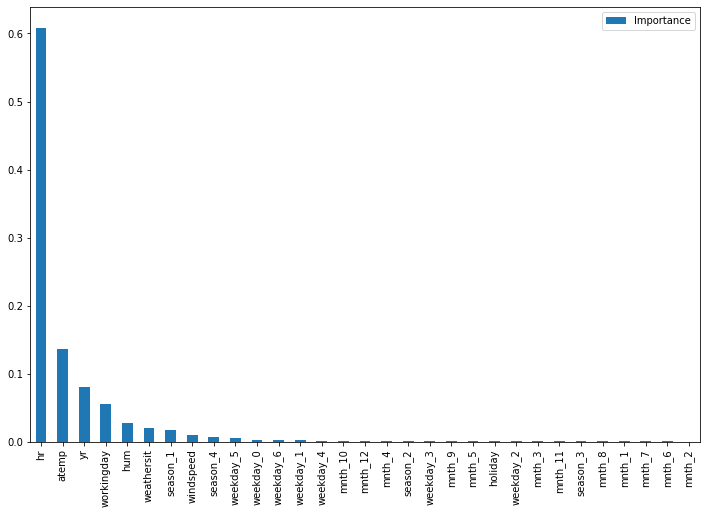

In [62]:
feat_importances.plot(kind='bar', figsize=(12,8))

As we can see the most important variables are:

* The Hour with an importance of 60%
* The Temperature with an importance of 14%
* The Year with an importance of 8%

# Insights
We found that the number of Bike Rentals depend on the `hour` and the `temperature`. Also, it seems that there is an interaction between variables, like `hour and day of week`, or `month and year` etc and for that reason the tree based models like Gradient Boost and Random Forest performed much better than the linear regression. Moreover, the tree based models are able to capture non linear relationships, so for example, the hours and the temperature do not have necessary linear relationship, so for example if it is extremely hot or cold then the bike rentals can drop. Our model has an RMSE of 42 in the test dataset which seems to be promising.

### Further Analysis
There is always a room of improvement when we build Machine Learning models. For instance we could try the following:

* Transform the `cnt` column to the logarith of `cnt`
* Try different models using Grid Search
* Fine tuning of the Hyperparameters of the model